In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
from matplotlib import pyplot as plt
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from models import SciNet
import pandas as pd
from utils import target_loss 
from loader import build_dataloader
import torch.optim.lr_scheduler as lr_scheduler
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

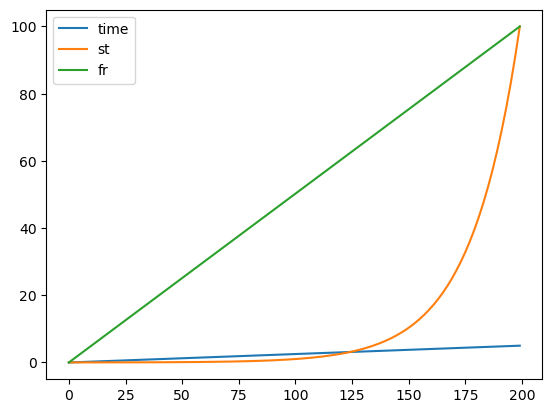

In [2]:
size = 200
t_max = 5
t = np.linspace(0, t_max, size)
min_fr, max_fr = 0.01, 100
fr = np.linspace(min_fr, max_fr, size)
start_st, end_st = 0.01, 100
st = np.logspace(np.log10(start_st), np.log10(end_st), size, endpoint = True)
plt.plot(t, label="time")
plt.plot(st, label="st")
plt.plot(fr, label="fr")
plt.legend()

In [3]:
# the function that we generate the data with
def f(t, st, fr):
    return st**2 * fr * (1 - t/st - np.exp(-t/st))
'''def f(t, st, fr):
    return  st + fr + t'''
data = []
for st_ in st:
    for fr_ in fr:
        example = list(f(t, st_, fr_))
        t_pred = np.random.uniform(0, t_max)
        pred = f(t_pred,st_,fr_)
        example.append(fr_)
        example.append(st_)
        example.append(t_pred)
        example.append(pred)
        data.append(example)
data = np.array(data)
colummns = [str(i) for i in range(size)]
colummns.append("fr")
colummns.append("st")
colummns.append("t_pred")
colummns.append("pred") 
df = pd.DataFrame(data,columns=colummns)
df.shape

(40000, 204)

In [4]:
# Setup scinet model with 3 latent neurons
scinet = SciNet(size,1,3,100)

# Load and prepare training data
dataloader = build_dataloader(size, batch_size =32)

In [5]:
# Training setup
SAVE_PATH = "trained_models/scinet1.dat"
N_EPOCHS = 200
optimizer = optim.Adam(scinet.parameters(), lr=0.001)
hist_error = []
hist_loss = []
scheduler = lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.009, total_iters=N_EPOCHS)
beta = 0.5

# Training loop
for epoch in range(N_EPOCHS):  
    epoch_error = []
    epoch_loss = []
    for i_batch, minibatch in enumerate(dataloader):
        time_series, _, _, question, answer = minibatch['time_series'] / 5, minibatch['fr'] / 5, minibatch['st'] / 5, minibatch['question'] / 5, minibatch['answer'] / 5
        print(time_series.size())
        # concat the time series with the features
        inputs = torch.cat((time_series, question.reshape(-1, 1)), 1)
        # build the output
        outputs = answer

        optimizer.zero_grad()
        # print(inputs[0])
        pred = scinet.forward(inputs)
        # print(pred)
        # break
        loss = target_loss(pred, outputs) + beta * scinet.kl_loss
        loss.backward()
        optimizer.step()
        error = torch.mean(torch.sqrt((pred[:,0]-outputs)**2)).detach().numpy()
        epoch_error.append(error)
        epoch_loss.append(loss.data.detach().numpy())
    # break
    hist_error.append(np.mean(epoch_error))
    hist_loss.append(np.mean(epoch_loss))

    before_lr = optimizer.param_groups[0]["lr"]
    scheduler.step()
    after_lr = optimizer.param_groups[0]["lr"]
    print("Epoch %d: SGD lr %.6f -> %.6f" % (epoch+1, before_lr, after_lr))
    
    print("Epoch %d -- loss %f, RMS error %f " % (epoch+1, hist_loss[-1], hist_error[-1]))
torch.save(scinet.state_dict(), SAVE_PATH)
print("Model saved to %s" % SAVE_PATH)

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
torch.Size([32, 104])
++++++++++++ 200


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x104 and 200x500)

In [ ]:


print("Original Data:", data)
print("Window Means:", window_means)


Original Data: [[ 0.00000000e+00 -4.05691115e-06 -9.10105114e-06 ...  1.00000000e-02
   3.50764592e+00 -3.49764592e-04]
 [ 0.00000000e+00 -4.13804937e-04 -9.28307216e-04 ...  1.00000000e-02
   9.10899737e-01 -9.18917732e-03]
 [ 0.00000000e+00 -8.23552963e-04 -1.84751338e-03 ...  1.00000000e-02
   1.04070359e+00 -2.09232829e-02]
 ...
 [ 0.00000000e+00 -1.24940704e-01 -4.99678698e-01 ...  1.00000000e+02
   2.58792809e+00 -3.25292094e+02]
 [ 0.00000000e+00 -1.26228621e-01 -5.04829499e-01 ...  1.00000000e+02
   2.47627427e+00 -3.01010353e+02]
 [ 0.00000000e+00 -1.27516538e-01 -5.09980300e-01 ...  1.00000000e+02
   1.83969526e-02 -1.69213557e-02]]


NameError: name 'window_means' is not defined

In [ ]:
# Plot some training history data
%matplotlib inline 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(hist_error)
ax1.set_ylabel("Amplitude RMSE")
ax2.plot(hist_loss)
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epoch")
plt.show()

: 

: 